In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu = 5
sigma = 6
N = 1000

X = np.random.normal(mu, sigma, N)

def grad_decsent(X, N, mu_0 = 3, sigma_0 = 10):
    
    def grad(X,v): 
        x = ((X - v[0]).sum())*((-1)/(v[1]**2))
        y = (N/(2*(v[1]**2))) - (1/(2*(v[1]**4)))*(((X-v[0])**2).sum())
        return np.array([x,y])
    
    i = 0
    v0 = np.array([mu_0, sigma_0])
    have_v0 = [v0[0]]
    have_v1 = [v0[1]]
    v = v0 - (1/100)*grad(X, v0)
    have_v0.append(v[0])
    have_v1.append(v[1])
    while np.linalg.norm(v - v0) > 0.008:
        i+=1
        v0 = v
        v = v - (1/(25+i))*grad(X,v)
        have_v0.append(v[0])
        have_v1.append(v[1])   
    print('Number of iterations: ',i)     
    return v, have_v0, have_v1


def natural_grad_decsent(X, N, mu_0 = 3, sigma_0 = 10):
    
    def grad(X,v): 
        x = ((X - v[0]).sum())*((-1)/(v[1]**2))
        y = (N/(2*(v[1]**2))) - (1/(2*(v[1]**4)))*(((X-v[0])**2).sum())
        return np.array([x,y])
    
    def fisher_mtx(X,v):
        a = (X - v[0])/v[1]
        b = ((X - v[0])**2)/(2*(v[1]**2)) - 1/(2*v[1])
        c = a*b
        a = a**2
        b = b**2
        F11 = a.sum()
        F12 = c.sum()
        F21 = F12
        F22 = b.sum()
        F = np.array([[F11,F12],[F21,F22]])
        return (1/N)*F
        
    v0 = np.array([mu_0, sigma_0])
    have_v0 = [v0[0]]
    have_v1 = [v0[1]]
    F_inv = np.linalg.inv(fisher_mtx(X,v0))
    v = v0 - (1/100)*F_inv@grad(X, v0)
    have_v0.append(v[0])
    have_v1.append(v[1])
    i = 0
    while np.linalg.norm(v - v0) > 0.008:
        i+=1
        v0 = v
        F_inv = np.linalg.inv(fisher_mtx(X,v0))
        v = v - (1/(25+i))*F_inv@grad(X,v)
        have_v0.append(v[0])
        have_v1.append(v[1])   
    print('Number of iterations: ',i)     
    return v, have_v0, have_v1

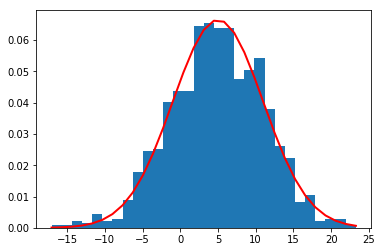

In [2]:
count, bins, ignored = plt.hist(X, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

In [3]:
new_v, new_have_x,new_have_y = grad_decsent(X, N)
print(new_v)

nat_v, have_nat_v0, have_nat_v1 = natural_grad_decsent(X, N)
print(nat_v)

Number of iterations:  76
[4.89715979 6.3620725 ]
Number of iterations:  18
[4.89619725 6.19944933]


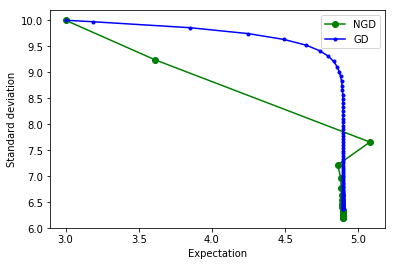

In [4]:
plt.plot(have_nat_v0,have_nat_v1,'go-',label='NGD')
plt.plot(new_have_x,new_have_y,'b.-',label='GD')
plt.xlabel('Expectation')
plt.ylabel('Standard deviation')
plt.legend()
plt.savefig('graphs.png')

Number of iterations:  76
[2.65270823 7.10084041]
Number of iterations:  28
[2.65177742 6.90483512]


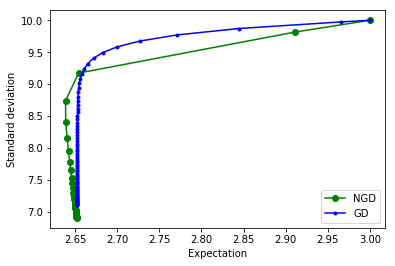

In [5]:
X = np.random.normal(3, 7, N)


new_v, new_have_x,new_have_y = grad_decsent(X, N)
print(new_v)
nat_v, have_nat_v0, have_nat_v1 = natural_grad_decsent(X, N)
print(nat_v)


plt.plot(have_nat_v0,have_nat_v1,'go-',label='NGD')
plt.plot(new_have_x,new_have_y,'b.-',label='GD')
plt.xlabel('Expectation')
plt.ylabel('Standard deviation')
plt.legend()
plt.savefig('graphs.png')

Number of iterations:  66
[2.32999257 5.1355951 ]
Number of iterations:  10
[2.32998746 5.06098711]


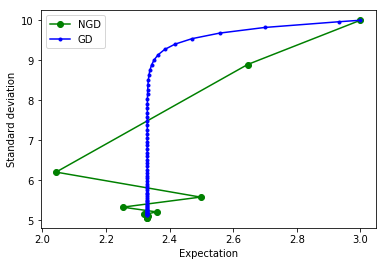

In [6]:
X = np.random.normal(2, 5, 1000)


new_v, new_have_x,new_have_y = grad_decsent(X, N)
print(new_v)
nat_v, have_nat_v0, have_nat_v1 = natural_grad_decsent(X, N)
print(nat_v)


plt.plot(have_nat_v0,have_nat_v1,'go-',label='NGD')
plt.plot(new_have_x,new_have_y,'b.-',label='GD')
plt.xlabel('Expectation')
plt.ylabel('Standard deviation')
plt.legend()
plt.savefig('graphs.png')

Number of iterations:  42
[6.04660753 9.20969041]
Number of iterations:  17
[6.04515548 8.65630883]


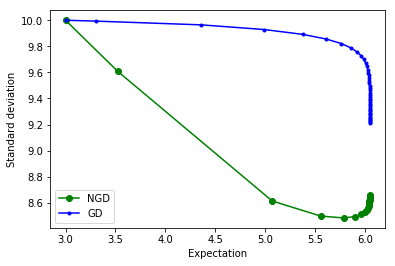

In [7]:
X = np.random.normal(6, 9, 1000)


new_v, new_have_x,new_have_y = grad_decsent(X, N)
print(new_v)
nat_v, have_nat_v0, have_nat_v1 = natural_grad_decsent(X, N)
print(nat_v)


plt.plot(have_nat_v0,have_nat_v1,'go-',label='NGD')
plt.plot(new_have_x,new_have_y,'b.-',label='GD')
plt.xlabel('Expectation')
plt.ylabel('Standard deviation')
plt.legend()
plt.savefig('graphs.png')